# Section 1: Business Understanding
This code compares the AirBnB prices for Boston and Seattle using a one-year calendar AirBnB data set from the Kaggle website. I will attempt to compare one-year prices, and respond to the following questions:

### 1-	Is AirBnB more costly in Boston or Seattle, on average?
### 2-	Is there pricing fluctuation over a year?
### 3-	What percentage of the location providers alters price over the course of a year?


In [2]:
# import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the files
df_B = pd.read_csv(r'file address.csv')
df_S = pd.read_csv(r'file address.csv')

# Section 2: Data Understanding
getting information about the data set

In [4]:
# information about data set
print('Boston', df_B.shape)
print('Seattle', df_S.shape, end='\n\n**\n\n')

print('Boston',df_B.columns)
print('Seattle', df_S.columns, end='\n\n**\n\n')

print('Boston', df_B.describe())
print('Seattle', df_S.describe(), end='\n\n**\n\n')

print('Boston info', df_B.info())
print('Seattle info', df_S.info(), end='\n\n**\n\n')

Boston (1308890, 4)
Seattle (1393570, 4)

**

Boston Index(['listing_id', 'date', 'available', 'price'], dtype='object')
Seattle Index(['listing_id', 'date', 'available', 'price'], dtype='object')

**

Boston          listing_id
count  1.308890e+06
mean   8.442118e+06
std    4.500149e+06
min    3.353000e+03
25%    4.679319e+06
50%    8.578710e+06
75%    1.279603e+07
max    1.493346e+07
Seattle          listing_id
count  1.393570e+06
mean   5.550111e+06
std    2.962274e+06
min    3.335000e+03
25%    3.258213e+06
50%    6.118244e+06
75%    8.035212e+06
max    1.034016e+07

**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB
Bos

# Section 3: preparing data
Dealing with null values, deleting useless columns, and providing proper formatting for the data at each column

In [5]:
# dealing with null values
print('Boston_before\n',pd.isnull(df_B).sum())
print('Seattle_before\n',pd.isnull(df_S).sum(), end='\n\n**\n\n')

df_B = df_B.dropna(axis=0, how='any', subset=['price'])
df_S = df_S.dropna(axis=0, how='any', subset=['price'])

print('Boston_after\n',pd.isnull(df_B).sum())
print('Seattle_after\n',pd.isnull(df_S).sum())


Boston_before
 listing_id         0
date               0
available          0
price         665853
dtype: int64
Seattle_before
 listing_id         0
date               0
available          0
price         459028
dtype: int64

**

Boston_after
 listing_id    0
date          0
available     0
price         0
dtype: int64
Seattle_after
 listing_id    0
date          0
available     0
price         0
dtype: int64


In [6]:
# removing available column because of having just value
print('Boston\n',df_B.available.unique())
print('Seattle\n',df_S.available.unique(), end='\n\n**\n\n')

df_B = df_B.drop('available', axis=1)
df_S = df_S.drop('available', axis=1)

print('Boston\n',df_B.shape)
print('Seattle\n',df_S.shape, end='\n\n**\n\n')

print('Boston\n',df_B.columns)
print('Seattle\n', df_S.columns)

Boston
 ['t']
Seattle
 ['t']

**

Boston
 (643037, 3)
Seattle
 (934542, 3)

**

Boston
 Index(['listing_id', 'date', 'price'], dtype='object')
Seattle
 Index(['listing_id', 'date', 'price'], dtype='object')


In [8]:
# preprocessing the data
df_B['date'] = pd.to_datetime(df_B.date)
df_S['date'] = pd.to_datetime(df_S.date)

df_B['price'] = df_B['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_S['price'] = df_S['price'].str.replace('$', '').str.replace(',', '').astype(float)

print('Boston\n',df_B.info())
print('Seattle\n',df_S.info(), end='\n\n**\n\n')

print('Boston\n',df_B.listing_id.unique().size)
print('Seattle\n',df_S.listing_id.unique().size)

<ipython-input-8-2ec7628b79a5>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_B['price'] = df_B['price'].str.replace('$', '').str.replace(',', '').astype(float)
<ipython-input-8-2ec7628b79a5>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_S['price'] = df_S['price'].str.replace('$', '').str.replace(',', '').astype(float)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 643037 entries, 365 to 1308879
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  643037 non-null  int64         
 1   date        643037 non-null  datetime64[ns]
 2   price       643037 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 19.6 MB
Boston
 None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   listing_id  934542 non-null  int64         
 1   date        934542 non-null  datetime64[ns]
 2   price       934542 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 28.5 MB
Seattle
 None

**

Boston
 2906
Seattle
 3723


# Section 4: data analyzing to answer to question 1 and 2
The monthly bar plot in this section depicts average price over a year for these two cities. It reveals that the average AirBnB pricing in Boston is higher than in Seattle. The average price in Boston varies between \\$180 and \$230, while the average price in Seattle is around \\$150. Both cities have seasonal variations. September is the most costly month in Boston and August is the most expensive month in Seattle. As shown in the graph, the plot's standard deviation is quite high, suggesting that the average is not an acceptable representation for each month and that we should compare prices in better approach which takes us to the next section.

In [40]:
# grouping the data over month by average price
print('Boston\n',df_B.shape)
df_B_group_M = df_B.groupby(df_B['date'].dt.strftime('%B')).agg(
    {'listing_id': 'first', 'price': ['mean', 'std', 'min', 'max']})
print('Boston\n',df_B_group_M.shape)
print('Boston\n',df_B_group_M, end='\n\n**\n\n')

print('Seattle\n',df_S.shape)
df_S_group_M = df_S.groupby(df_S['date'].dt.strftime('%B')).agg(
    {'listing_id': 'first', 'price': ['mean', 'std', 'min', 'max']})
print('Seattle\n',df_S_group_M.shape)
print('Seattle\n',df_S_group_M)

Boston
 (643037, 3)
Boston
 (12, 5)
Boston
           listing_id       price                          
               first        mean         std   min     max
date                                                      
April        3075044  197.252890  191.834132  20.0  4000.0
August       3075044  203.330142  206.042823  20.0  4000.0
December     3075044  192.601915  162.010643  20.0  4000.0
February     3075044  180.961028  160.768760  20.0  4000.0
January      3075044  182.799671  155.362723  20.0  4000.0
July         3075044  202.486309  198.128376  20.0  4000.0
June         3075044  196.535302  184.482541  11.0  4000.0
March        3075044  181.818742  168.955611  20.0  4000.0
May          3075044  193.712295  184.614451  11.0  4000.0
November     3075044  202.924416  167.079498  20.0  4000.0
October      3075044  233.416248  185.672621  20.0  7163.0
September    3075044  237.047727  194.734680  20.0  4000.0

**

Seattle
 (934542, 3)
Seattle
 (12, 5)
Seattle
           listing_i

In [41]:
# cleaning the grouped data and sort them by month
month_order = ['January', "February", 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']

df_B_group_M.index = pd.CategoricalIndex(df_B_group_M.index, categories=month_order, ordered=True)
df_B_group_M = df_B_group_M.sort_index().reset_index()

df_B_group_M.rename(columns={'date': '', '': 'date', 'listing_id': '', 'first': 'listing_id_first', \
                             'price': '', 'mean': 'price_mean', 'std': 'price_std', 'min': 'price_min',
                             'max': 'price_max'}, inplace=True, )
df_B_group_M.columns = df_B_group_M.columns.droplevel()
print('Boston\n',df_B_group_M)

df_S_group_M.index = pd.CategoricalIndex(df_S_group_M.index, categories=month_order, ordered=True)
df_S_group_M = df_S_group_M.sort_index().reset_index()

df_S_group_M.rename(columns={'date': '', '': 'date', 'listing_id': '', 'first': 'listing_id_first', \
                             'price': '', 'mean': 'price_mean', 'std': 'price_std', 'min': 'price_min',
                             'max': 'price_max'}, inplace=True, )
df_S_group_M.columns = df_S_group_M.columns.droplevel()
print('Seattle\n',df_S_group_M)

Boston
          date  listing_id_first  price_mean   price_std  price_min  price_max
0     January           3075044  182.799671  155.362723       20.0     4000.0
1    February           3075044  180.961028  160.768760       20.0     4000.0
2       March           3075044  181.818742  168.955611       20.0     4000.0
3       April           3075044  197.252890  191.834132       20.0     4000.0
4         May           3075044  193.712295  184.614451       11.0     4000.0
5        June           3075044  196.535302  184.482541       11.0     4000.0
6        July           3075044  202.486309  198.128376       20.0     4000.0
7      August           3075044  203.330142  206.042823       20.0     4000.0
8   September           3075044  237.047727  194.734680       20.0     4000.0
9     October           3075044  233.416248  185.672621       20.0     7163.0
10   November           3075044  202.924416  167.079498       20.0     4000.0
11   December           3075044  192.601915  162.010643 

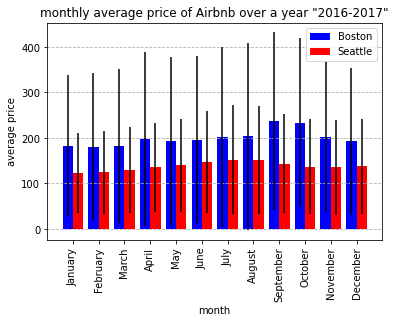

In [42]:
# data visualization: monthly comparison by bar plot
plt.figure()
w = 0.4
plt.bar(df_B_group_M.index, df_B_group_M['price_mean'], w, color='blue', yerr=df_B_group_M['price_std'], label='Boston')
plt.bar(df_B_group_M.index + w, df_S_group_M['price_mean'], w, color='red', yerr=df_S_group_M['price_std'],
        label='Seattle')
plt.xlabel('month')
plt.ylabel('average price')
plt.title('monthly average price of Airbnb over a year "2016-2017"')
plt.grid(axis='y', linestyle='--')
plt.xticks(df_B_group_M.index + w / 2, df_B_group_M['date'], rotation='vertical')
plt.legend()
plt.show()

# Section 5: better analyzing to answer to question 1 and 2

The month's box plot illustrates the price distribution in each city. The first important finding is that there are a lot of outliers, and certain data are really distant from the average of the data set. By deleting 8 listing id from Boston data and one from Seattle data, all prices are less than \\$1000. Not only does comparing the box plots support our conclusion from the bar plot, but it also explains why that plot has such a significant standard deviation. Around the average, the data is completely imbalanced. While 50\% of the data is less than the average value, which is in the range of \\$100 to \\$200, the other 50\% of the data is in the range of $800. Actually, one can state that the availability of lower-than-average costs is higher in both cities at each month.

In [9]:
# two level grouping of the data over month and listing_id by average price and count over listing_id
print('Boston\n',df_B.shape)
df_B_group_M_id = df_B.groupby([df_B['date'].dt.strftime('%B'), 'listing_id']).agg(
    {'listing_id': 'count', 'price': ['mean', 'std', 'min', 'max']})
print('Boston\n',df_B_group_M_id.shape)
print('Boston\n',df_B_group_M_id, end='\n\n**\n\n')

print('Seattle\n',df_S.shape)
df_S_group_M_id = df_S.groupby([df_S['date'].dt.strftime('%B'), 'listing_id']).agg(
    {'listing_id': 'count', 'price': ['mean', 'std', 'min', 'max']})
print('Seattle\n',df_S_group_M_id.shape)
print('Seattle\n',df_S_group_M_id)

Boston
 (643037, 3)
Boston
 (24942, 5)
Boston
                      listing_id       price                         
                          count        mean        std    min    max
date      listing_id                                                
April     3353               30   36.000000   0.000000   36.0   36.0
          5506               30  171.000000  52.888953  145.0  275.0
          6695               30  221.000000  52.888953  195.0  325.0
          6976               30   65.000000   0.000000   65.0   65.0
          8792               30  154.000000   0.000000  154.0  154.0
...                         ...         ...        ...    ...    ...
September 14924831            1  180.000000        NaN  180.0  180.0
          14928000           30   55.000000   0.000000   55.0   55.0
          14928333           11   96.454545  16.765224   70.0  113.0
          14933380           20   49.000000   0.000000   49.0   49.0
          14933461            6  167.833333   6.940221  

In [44]:
# cleaning the grouped data and sort them by month
month_order = ['January', "February", 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
               'November', 'December']


df_B_group_M_id.rename(columns={'date': '', '': 'month','listing_id':'','count': 'number_days', 'price': '',\
                                'mean': 'price_mean','std': 'price_std','min': 'price_min', 'max': 'price_max'}\
                       , inplace=True, )

df_B_group_M_id.columns = df_B_group_M_id.columns.droplevel()
df_B_group_M_id = df_B_group_M_id.reset_index()

df_B_group_M_id.index = pd.CategoricalIndex(df_B_group_M_id['date'], categories=month_order, ordered=True)
df_B_group_M_id = df_B_group_M_id.sort_index().reset_index(drop=True)

print('Boston\n',df_B_group_M_id, end='\n\n**\n\n')


df_S_group_M_id.rename(columns={'date': '', '': 'month','listing_id':'','count': 'number_days', 'price': '',\
                                'mean': 'price_mean','std': 'price_std','min': 'price_min', 'max': 'price_max'}\
                       , inplace=True, )

df_S_group_M_id.columns = df_S_group_M_id.columns.droplevel()
df_S_group_M_id = df_S_group_M_id.reset_index()

df_S_group_M_id.index = pd.CategoricalIndex(df_S_group_M_id['date'], categories=month_order, ordered=True)
df_S_group_M_id = df_S_group_M_id.sort_index().reset_index(drop=True)

print('Seattle\n',df_S_group_M_id)

Boston
            date  listing_id  number_days  price_mean  price_std  price_min  \
0       January     3957602           31   76.290323   2.224014       75.0   
1       January     5025015           31  175.000000   0.000000      175.0   
2       January     5048406           31   78.000000   0.000000       78.0   
3       January     5049582           31   70.000000   0.000000       70.0   
4       January     5054601           31   75.000000   0.000000       75.0   
...         ...         ...          ...         ...        ...        ...   
24937  December     5834413           31  342.000000   0.000000      342.0   
24938  December     5834930           31  125.000000   0.000000      125.0   
24939  December     5851489           31  169.000000   0.000000      169.0   
24940  December     5870922           31   72.935484   2.731733       69.0   
24941  December      570493            4  125.000000   0.000000      125.0   

       price_max  
0           80.0  
1          175.0 

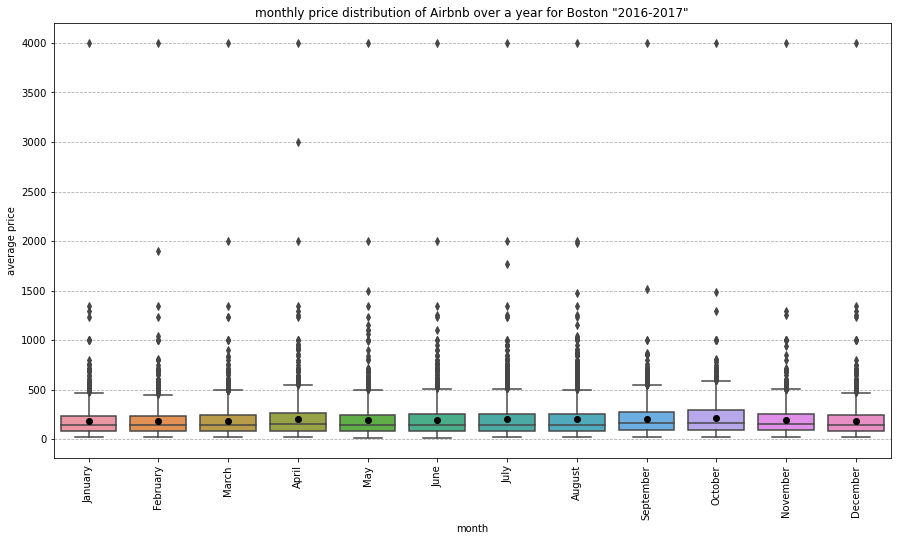

In [45]:
# Box plot for Boston data
plt.figure(figsize = (15,8))
BP_B=sns.boxplot(x='date', y='price_mean',data=df_B_group_M_id, showmeans=True,\
                 meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.xlabel('month')
plt.ylabel('average price')
plt.title('monthly price distribution of Airbnb over a year for Boston "2016-2017"')
plt.grid(axis='y', linestyle='--')
BP_B.set_xticklabels(BP_B.get_xticklabels(),rotation = 90)
plt.show()

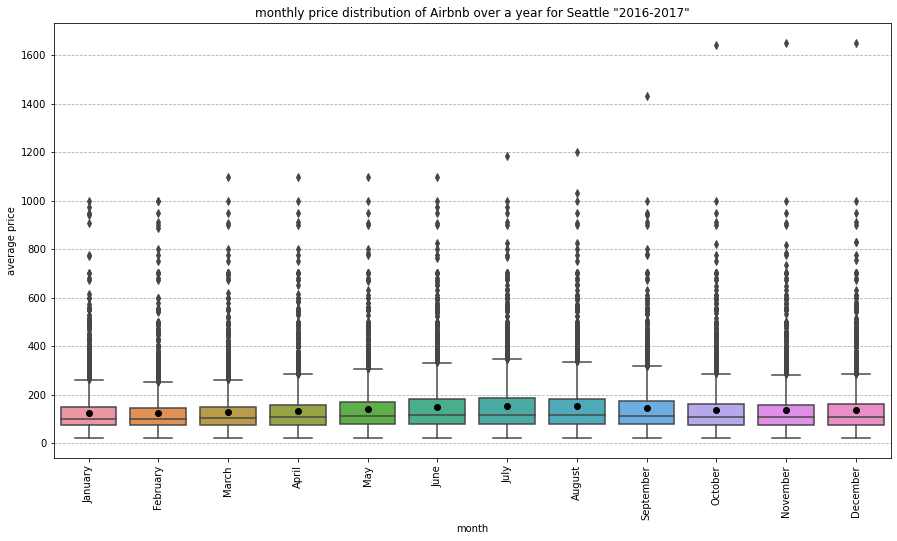

In [46]:
# Box plot for Seattle data
plt.figure(figsize = (15,8))
BP_S=sns.boxplot(x='date', y='price_mean',data=df_S_group_M_id, showmeans=True,\
                 meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.xlabel('month')
plt.ylabel('average price')
plt.title('monthly price distribution of Airbnb over a year for Seattle "2016-2017"')
plt.grid(axis='y', linestyle='--')
BP_S.set_xticklabels(BP_S.get_xticklabels(),rotation = 90)
plt.show()

In [47]:
# removing outliers higher than $1000
df_B_group_M_id_outlier=df_B_group_M_id[df_B_group_M_id['price_mean']<1000]
df_S_group_M_id_outlier=df_S_group_M_id[df_S_group_M_id['price_mean']<1000]

print('Boston\n',df_B.listing_id.unique().size)
print('Boston outlier removed\n',df_B_group_M_id_outlier.listing_id.unique().size, end='\n\n**\n\n')

print('Seattle\n',df_S.listing_id.unique().size)
print('Seattle outlier removed\n',df_S_group_M_id_outlier.listing_id.unique().size, end='\n\n**\n\n')

Boston
 2906
Boston outlier removed
 2898

**

Seattle
 3723
Seattle outlier removed
 3722

**



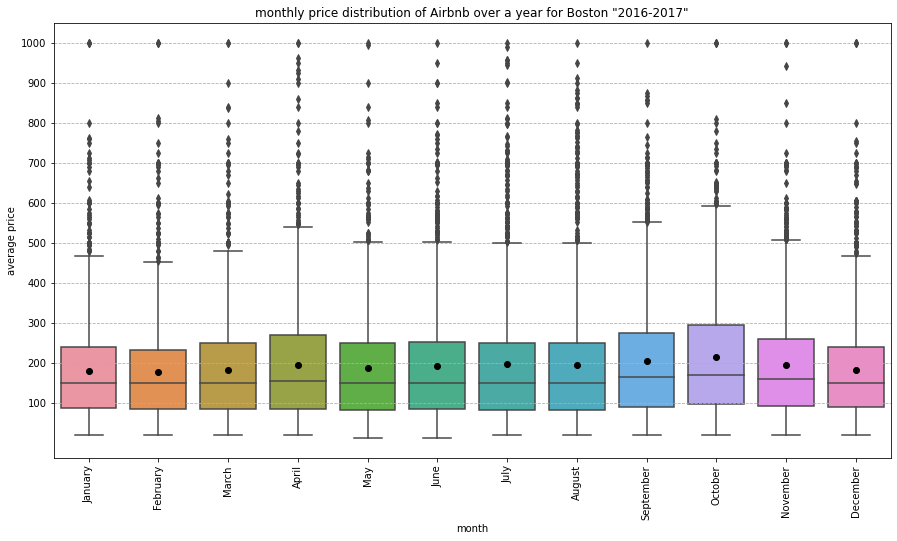

<Figure size 432x288 with 0 Axes>

In [48]:
# Box plot for Boston data outliers removed
plt.figure(figsize = (15,8))
BP_B=sns.boxplot(x='date', y='price_mean',data=df_B_group_M_id_outlier, showmeans=True,\
                 meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.xlabel('month')
plt.ylabel('average price')
plt.title('monthly price distribution of Airbnb over a year for Boston "2016-2017"')
plt.grid(axis='y', linestyle='--')
BP_B.set_xticklabels(BP_B.get_xticklabels(),rotation = 90)
plt.yticks([100,200,300,400,500,600,700,800,900,1000])
plt.show()

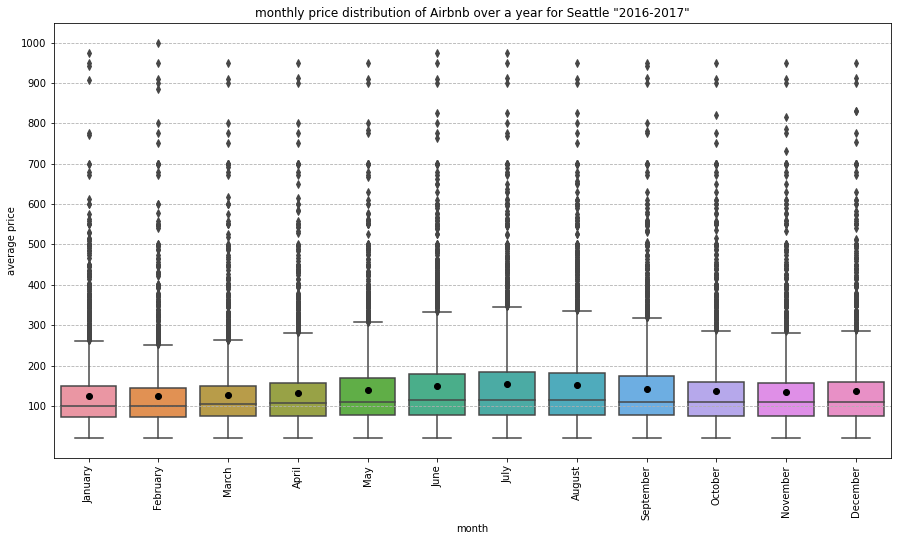

In [49]:
# Box plot for Seattle data outliers removed
plt.figure(figsize = (15,8))
BP_S=sns.boxplot(x='date', y='price_mean',data=df_S_group_M_id_outlier, showmeans=True,\
                 meanprops={"marker":"o","markerfacecolor":"black", "markeredgecolor":"black"})
plt.xlabel('month')
plt.ylabel('average price')
plt.title('monthly price distribution of Airbnb over a year for Seattle "2016-2017"')
plt.grid(axis='y', linestyle='--')
BP_S.set_xticklabels(BP_S.get_xticklabels(),rotation = 90)
plt.yticks([100,200,300,400,500,600,700,800,900,1000])
plt.show()

# Section 6: answer to the third question
this section attempts to answer the question, "What proportion of location providers changes their prices over the course of a year?"
Pie plot in this Section indicates that around 62% of AirBnB locations in Boston change their price over a year and it is around 56% for Seattle. 

In [53]:
# two level grouping of the data over listing_id and week by averaging the price
print(df_B.shape)
df_B_group = df_B.groupby(['listing_id', df_B['date'].dt.strftime('%W').astype(int)]).mean()
print(df_B_group.shape)
print(df_B_group, end='\n\n**\n\n')

print(df_S.shape)
df_S_group = df_S.groupby(['listing_id', df_S['date'].dt.strftime('%W').astype(int)]).mean()
print(df_S_group.shape)
print(df_S_group)


(643037, 3)
(101000, 1)
                      price
listing_id date            
3353       0      32.000000
           1      32.142857
           2      32.285714
           3      33.000000
           4      33.000000
...                     ...
14933461   36    165.000000
           39    182.000000
           40    165.000000
           43    165.000000
           44    165.000000

[101000 rows x 1 columns]**

(934542, 3)
(142160, 1)
                 price
listing_id date       
3335       0     120.0
           1     120.0
           9     120.0
           10    120.0
           11    120.0
...                ...
10340165   48     43.0
           49     43.0
           50     43.0
           51     43.0
           52     43.0

[142160 rows x 1 columns]


In [54]:
# counting the listing_id that includes change of price over ayear
B_price_change_number = 0
seen_B = set()
for i, v in enumerate(df_B_group.index):
    try:
        if v[0] == df_B_group.index[i - 1][0]:
            if df_B_group.loc[v, 'price'] != df_B_group.loc[(v[0], v[1] - 1), 'price']:
                if v[0] not in seen_B:
                    B_price_change_number += 1
                    seen_B.add(v[0])
    except:
        continue


S_price_change_number = 0
seen_S = set()
df_S_group_vary = pd.DataFrame
for i, v in enumerate(df_S_group.index):
    try:
        if v[0] == df_S_group.index[i - 1][0]:
            if df_S_group.loc[v, 'price'] != df_S_group.loc[(v[0], v[1] - 1), 'price']:
                if v[0] not in seen_S:
                    S_price_change_number += 1
                    seen_S.add(v[0])
    except:
        continue

print('Boston\n',df_B.shape)
print('Boston change\n',B_price_change_number, end='\n\n**\n\n')
print('Seattle\n',df_S.shape)
print('Seattle change\n',S_price_change_number)

Boston
 (643037, 3)
Boston change
 1794

**

Seattle
 (934542, 3)
Seattle change
 2073


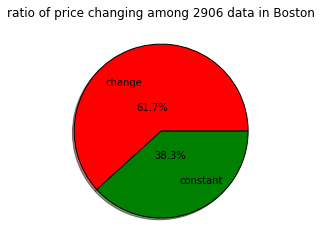

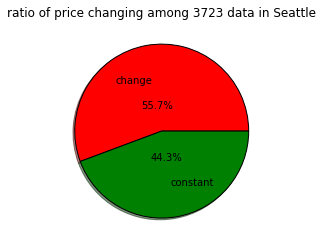

In [55]:
# data visualization pie plot: what ratio of prices changes over a year
plt.figure()
plt.pie([B_price_change_number, df_B.listing_id.unique().size - B_price_change_number], labels=['change', 'constant'],\
        shadow=True, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', pctdistance=0.3, labeldistance=0.6, \
        colors=['r', 'g'])
plt.title('ratio of price changing among {} data in Boston'.format(df_B.listing_id.unique().size))
plt.show()

plt.figure()
plt.pie([S_price_change_number, df_S.listing_id.unique().size - S_price_change_number], labels=['change', 'constant'],\
        shadow=True, wedgeprops={'edgecolor': 'black'}, autopct='%1.1f%%', pctdistance=0.3, labeldistance=0.6, \
        colors=['r', 'g'])
plt.title('ratio of price changing among {} data in Seattle'.format(df_S.listing_id.unique().size))
plt.show()
